## Merge two datasets

In [10]:
import pandas as pd
import numpy as np

In [47]:
df=pd.read_csv('covid19_nursing_dta_2.csv')
df.shape
df.ndim
df.head()

,Unnamed: 0,Federal Provider Number,Provider Phone Number,Provider SSA County,Provider County Name,Ownership Type,Number of Certified Beds,Average Number of Residents Per Day,Provider Type,Provider Resides in Hospital,...,"Total Resident COVID-19 Deaths Per 1,000 Residents",Total Residents COVID-19 Deaths as a Percentage of Confirmed COVID-19 Cases,date,One-Week Supply of N95 Masks,One-Week Supply of Surgical Masks,One-Week Supply of Eye Protection,One-Week Supply of Gowns,One-Week Supply of Gloves,One-Week Supply of Hand Sanitizer,Number of Ventilators in Use for COVID-19
0,0,015009,2.563324e+09,290.0,Franklin,For profit - Corporation,57.0,50.1,Medicare and Medicaid,False,...,98.0,10.4,2020-10-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,015010,2.562496e+09,600.0,Talladega,For profit - Corporation,85.0,74.8,Medicare and Medicaid,False,...,31.3,28.6,2020-10-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,015012,2.562184e+09,350.0,Jackson,Government - County,50.0,46.9,Medicare and Medicaid,True,...,0.0,0.0,2020-10-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,015014,2.058330e+09,360.0,Jefferson,For profit - Individual,92.0,82.8,Medicare and Medicaid,False,...,0.0,0.0,2020-10-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,015016,2.562322e+09,410.0,Limestone,For profit - Corporation,149.0,126.5,Medicare and Medicaid,False,...,0.0,0.0,2020-10-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#provider info
#df1 = pd.read_csv('https://data.medicare.gov/resource/4pq5-n9py.csv') 

#covid 19 nursing home dataset
#df2 = pd.read_csv('https://data.cms.gov/resource/s2uc-8wxp.csv') 

df1 = pd.read_csv("Provider_Info.csv")
df2 = pd.read_csv("COVID-19_Nursing_Home_Dataset.csv")



/Users/summerxue/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
print(len(df1))
print(len(df2))

15361
322494


In [15]:
df1.describe()

,Provider Zip Code,Provider Phone Number,Provider SSA County,Number of Certified Beds,Average Number of Residents Per Day,Average Number of Residents per Day Footnote,Overall Rating,Overall Rating Footnote,Health Inspection Rating,Health Inspection Rating Footnote,...,Adjusted LPN Staffing Hours per Resident per Day,Adjusted RN Staffing Hours per Resident per Day,Adjusted Total Nurse Staffing Hours per Resident per Day,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties
count,15361.000000,1.536100e+04,15361.000000,15361.000000,15277.000000,84.0,15155.000000,206.00000,15155.000000,206.00000,...,14859.000000,14859.000000,14859.000000,15237.000000,15361.000000,15361.000000,15361.000000,1.536100e+04,15361.000000,15361.000000
mean,50305.201354,5.871339e+09,389.837771,106.470998,86.118544,10.0,3.220389,7.76699,2.809238,7.76699,...,0.871120,0.703145,3.871505,61.443987,1.274787,3.783673,0.368205,1.207352e+04,0.088992,0.457197
std,26852.317218,2.331978e+09,273.604206,60.666080,52.639453,0.0,1.413324,8.34173,1.279515,8.34173,...,0.338471,0.461732,0.877216,66.370797,3.183465,6.924538,0.716502,4.361317e+04,0.331441,0.878272
min,660.000000,1.234568e+09,0.000000,1.000000,1.000000,10.0,1.000000,1.00000,1.000000,1.00000,...,0.000000,0.005080,1.215880,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,29812.000000,3.867344e+09,150.000000,65.000000,51.500000,10.0,2.000000,1.00000,2.000000,1.00000,...,0.661115,0.410360,3.301240,21.333000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
50%,48823.000000,6.057964e+09,360.000000,99.000000,78.400000,10.0,3.000000,1.00000,3.000000,1.00000,...,0.860920,0.599540,3.752250,41.500000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000
75%,72764.000000,8.017854e+09,590.000000,127.000000,107.700000,10.0,5.000000,18.00000,4.000000,18.00000,...,1.062655,0.877155,4.265145,78.000000,1.000000,4.000000,1.000000,6.500000e+03,0.000000,1.000000
max,99929.000000,1.000000e+10,996.000000,1389.000000,751.000000,10.0,5.000000,18.00000,5.000000,18.00000,...,5.042850,6.693870,11.947970,1118.000000,74.000000,116.000000,8.000000,1.258368e+06,4.000000,8.000000


In [16]:
#len(df1) 
#drop 
#df1.average_number_of_residents_per_day_footnote.isnull().sum()

In [17]:
df1.columns
#df1.overall_rating_footnote.isnull().sum()


Index(['Federal Provider Number', 'Provider Name', 'Provider Address',
       'Provider City', 'Provider State', 'Provider Zip Code',
       'Provider Phone Number', 'Provider SSA County', 'Provider County Name',
       'Ownership Type', 'Number of Certified Beds',
       'Average Number of Residents Per Day',
       'Average Number of Residents per Day Footnote', 'Provider Type',
       'Provider Resides in Hospital', 'Legal Business Name',
       'Date First Approved to Provide Medicare and Medicaid services',
       'Continuing Care Retirement Community', 'Special Focus Status',
       'Abuse Icon', 'Most Recent Health Inspection More Than 2 Years Ago',
       'Provider Changed Ownership in Last 12 Months',
       'With a Resident and Family Council',
       'Automatic Sprinkler Systems in All Required Areas', 'Overall Rating',
       'Overall Rating Footnote', 'Health Inspection Rating',
       'Health Inspection Rating Footnote', 'QM Rating', 'QM Rating Footnote',
       'Long-Sta

In [18]:
### Nursing home characteristics 

varlist = ['Federal Provider Number',
       'Provider Phone Number', 'Provider SSA County', 'Provider County Name',
       'Ownership Type', 'Number of Certified Beds',
       'Average Number of Residents Per Day',
        'Provider Type',
       'Provider Resides in Hospital', 'Legal Business Name',
       'Date First Approved to Provide Medicare and Medicaid services',
       'Continuing Care Retirement Community', 'Special Focus Status',
       'Abuse Icon', 'Most Recent Health Inspection More Than 2 Years Ago',
       'Provider Changed Ownership in Last 12 Months',
       'With a Resident and Family Council',
       'Automatic Sprinkler Systems in All Required Areas', 'Overall Rating',
        'Health Inspection Rating',
        'QM Rating', 
       'Long-Stay QM Rating', 
       'Short-Stay QM Rating',
       'Staffing Rating',  'RN Staffing Rating',
      
       'Reported Nurse Aide Staffing Hours per Resident per Day',
       
       'Reported LPN Staffing Hours per Resident per Day',
       'Reported RN Staffing Hours per Resident per Day',
       'Reported Licensed Staffing Hours per Resident per Day',
       'Reported Total Nurse Staffing Hours per Resident per Day',
       'Reported Physical Therapist Staffing Hours per Resident Per Day',
       'Case-Mix Nurse Aide Staffing Hours per Resident per Day',
       'Case-Mix LPN Staffing Hours per Resident per Day',
       'Case-Mix RN Staffing Hours per Resident per Day',
       'Case-Mix Total Nurse Staffing Hours per Resident per Day',
       'Adjusted Nurse Aide Staffing Hours per Resident per Day',
       'Adjusted LPN Staffing Hours per Resident per Day',
       'Adjusted RN Staffing Hours per Resident per Day',
       'Adjusted Total Nurse Staffing Hours per Resident per Day',
       'Rating Cycle 1 Standard Survey Health Date',
       'Rating Cycle 1 Total Number of Health Deficiencies',
       'Rating Cycle 1 Number of Standard Health Deficiencies',
       'Rating Cycle 1 Number of Complaint Health Deficiencies',
       'Rating Cycle 1 Health Deficiency Score',
       'Rating Cycle 1 Number of Health Revisits',
       'Rating Cycle 1 Health Revisit Score',
       'Rating Cycle 1 Total Health Score',
       'Rating Cycle 2 Standard Health Survey Date',
       'Rating Cycle 2 Total Number of Health Deficiencies',
       'Rating Cycle 2 Number of Standard Health Deficiencies',
       'Rating Cycle 2 Number of Complaint Health Deficiencies',
       'Rating Cycle 2 Health Deficiency Score',
       'Rating Cycle 2 Number of Health Revisits',
       'Rating Cycle 2 Health Revisit Score',
       'Rating Cycle 2 Total Health Score',
       'Rating Cycle 3 Standard Health Survey Date',
       'Rating Cycle 3 Total Number of Health Deficiencies',
       'Rating Cycle 3 Number of Standard Health Deficiencies',
       'Rating Cycle 3 Number of Complaint Health Deficiencies',
       'Rating Cycle 3 Number of Health Revisits',
       'Rating Cycle 3 Health Deficiency Score',
       'Rating Cycle 3 Health Revisit Score',
       'Rating Cycle 3 Total Health Score',
       'Total Weighted Health Survey Score',
       'Number of Facility Reported Incidents',
       'Number of Substantiated Complaints', 'Number of Fines',
       'Total Amount of Fines in Dollars', 'Number of Payment Denials',
       'Total Number of Penalties', 'Location', 'Processing Date']

df1 = df1[varlist]
print('total number of characteristics/variables', len(df1.columns))

total number of characteristics/variables 72


### covariates not in the above list (basically all footnote)

'overall_rating_footnote','health_inspection_rating_footnote',  'qm_rating_footnote', 'long_stay_qm_rating_footnote','short_stay_qm_rating_footnote', 'rn_staffing_rating_footnote', 'reported_staffing_footnote','physical_therapist_staffing_footnote','staffing_rating_footnote', 

In [19]:
#df2.columns
#looks fine

In [20]:
df2.describe()
#Looks okay

,Provider Zip Code,Residents Weekly Admissions COVID-19,Residents Total Admissions COVID-19,Residents Weekly Confirmed COVID-19,Residents Total Confirmed COVID-19,Residents Weekly Suspected COVID-19,Residents Total Suspected COVID-19,Residents Weekly All Deaths,Residents Total All Deaths,Residents Weekly COVID-19 Deaths,...,Staff Total Confirmed COVID-19,Staff Weekly Suspected COVID-19,Staff Total Suspected COVID-19,Staff Weekly COVID-19 Deaths,Staff Total COVID-19 Deaths,Number of Ventilators in Facility,Number of Ventilators in Use for COVID-19,"Total Resident Confirmed COVID-19 Cases Per 1,000 Residents","Total Resident COVID-19 Deaths Per 1,000 Residents",Total Residents COVID-19 Deaths as a Percentage of Confirmed COVID-19 Cases
count,322494.000000,317522.000000,317522.000000,317522.000000,317522.000000,317522.000000,317522.000000,317522.000000,317522.000000,317522.000000,...,317522.000000,317522.000000,317522.000000,317522.000000,317522.000000,11885.000000,11868.000000,316084.000000,316084.000000,160072.000000
mean,50300.775270,0.340405,4.722133,0.820645,11.713009,0.463051,6.890489,0.749696,10.558774,0.190510,...,8.807314,0.441535,6.222403,0.003071,0.044476,18.329575,2.300051,150.346213,38.290774,33.356584
std,26853.572833,2.003020,13.863823,4.758540,22.933105,3.262076,18.589832,3.632247,26.896490,1.406193,...,14.846645,2.551519,16.944567,0.067250,0.298141,15.751985,7.257292,329.297239,100.240689,135.811169
min,660.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29801.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000
50%,48823.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,5.000000,0.000000,...,3.000000,0.000000,1.000000,0.000000,0.000000,15.000000,0.000000,7.100000,0.000000,13.600000
75%,72764.000000,0.000000,3.000000,0.000000,12.000000,0.000000,5.000000,1.000000,13.000000,0.000000,...,12.000000,0.000000,6.000000,0.000000,0.000000,25.000000,0.000000,159.600000,29.900000,31.400000
max,99929.000000,212.000000,380.000000,222.000000,318.000000,281.000000,600.000000,522.000000,2013.000000,91.000000,...,620.000000,492.000000,824.000000,7.000000,10.000000,141.000000,102.000000,42000.000000,8000.000000,8600.000000


### Variables related to cases:

'Residents Weekly Admissions COVID-19',
       'Residents Total Admissions COVID-19',
       'Residents Weekly Confirmed COVID-19',
       'Residents Total Confirmed COVID-19',
       'Residents Weekly Suspected COVID-19',
       'Residents Total Suspected COVID-19', 'Residents Weekly All Deaths',
       'Residents Total All Deaths', 'Residents Weekly COVID-19 Deaths',
       'Residents Total COVID-19 Deaths',
       
'Staff Weekly Confirmed COVID-19', 'Staff Total Confirmed COVID-19',
       'Staff Weekly Suspected COVID-19', 'Staff Total Suspected COVID-19',
       'Staff Weekly COVID-19 Deaths', 'Staff Total COVID-19 Deaths',
       
'Total Resident Confirmed COVID-19 Cases Per 1,000 Residents',
       'Total Resident COVID-19 Deaths Per 1,000 Residents',
       'Total Residents COVID-19 Deaths as a Percentage of Confirmed COVID-19 Cases',
       'Three or More Confirmed COVID-19 Cases This Week',
       'Initial Confirmed COVID-19 Case This Week',
       
       
### Variables related to resource:   

'Any Current Supply of N95 Masks', 'One-Week Supply of N95 Masks',
       'Any Current Supply of Surgical Masks',
       'One-Week Supply of Surgical Masks',
       'Any Current Supply of Eye Protection',
       'One-Week Supply of Eye Protection', 'Any Current Supply of Gowns',
       'One-Week Supply of Gowns', 'Any Current Supply of Gloves',
       'One-Week Supply of Gloves', 'Any Current Supply of Hand Sanitizer',
       'One-Week Supply of Hand Sanitizer', 'Ventilator Dependent Unit',
       'Number of Ventilators in Facility',
       'Number of Ventilators in Use for COVID-19',
       'Any Current Supply of Ventilator Supplies',
       'One-Week Supply of Ventilator Supplies'

In [37]:
#merge df1 df2 using 'federal_provider_number'

newdf = df1.merge(df2, how='left', left_on = 'Federal Provider Number',right_on = 'Federal Provider Number')


In [38]:
newdf.head()

,Federal Provider Number,Provider Phone Number,Provider SSA County,Provider County Name,Ownership Type,Number of Certified Beds,Average Number of Residents Per Day,Provider Type,Provider Resides in Hospital,Legal Business Name,...,Number of Ventilators in Use for COVID-19,Any Current Supply of Ventilator Supplies,One-Week Supply of Ventilator Supplies,"Total Resident Confirmed COVID-19 Cases Per 1,000 Residents","Total Resident COVID-19 Deaths Per 1,000 Residents",Total Residents COVID-19 Deaths as a Percentage of Confirmed COVID-19 Cases,County,Three or More Confirmed COVID-19 Cases This Week,Initial Confirmed COVID-19 Case This Week,Geolocation
0,676413,9725437700,390,Dallas,For profit - Corporation,132,102.3,Medicare and Medicaid,False,EASTLAND MEMORIAL HOSPITAL DISTRICT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,676364,2547711226,120,Bell,For profit - Limited Liability company,60,45.7,Medicare and Medicaid,False,S-H THIRTY-FIVE OPCO - TEMPLE MERIDIAN LLC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,676445,9798653145,70,Austin,For profit - Limited Liability company,50,33.3,Medicare and Medicaid,False,LTC OF AUSTIN COUNTY III LLC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,676399,3254553200,886,San Saba,For profit - Corporation,72,49.5,Medicare and Medicaid,False,"SAN SABA REHABILITATION, LP",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,676417,2813478200,610,Harris,For profit - Corporation,126,96.6,Medicare and Medicaid,False,KATY LONG TERM CARE LLC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
newdf['date'] = pd.to_datetime(newdf['Week Ending'])
newdf_1 = newdf.loc[newdf.groupby('Federal Provider Number').date.idxmax()] #keep the last occurance

KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

In [ ]:
print(len(newdf))
print(len(newdf_1))


In [ ]:

print(newdf_1.date.unique())


In [ ]:
import matplotlib.pyplot as plt

plt.plot(newdf_1.date.value_counts(normalize=True) * 100)

### Some nursing home stop reporting since Mid June, but only a small portion (see the chart below)

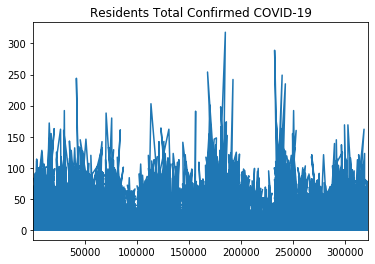

In [127]:
#cases


newdf_1['Residents Total Confirmed COVID-19'].plot()
plt.title('Residents Total Confirmed COVID-19')
plt.show()


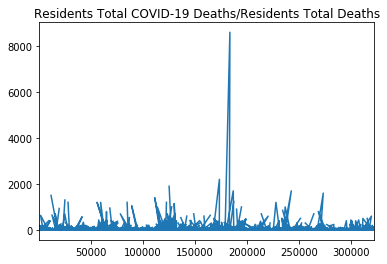

In [129]:
# ratio: resident deaths / Total deaths

#Total residents with suspected or laboratory positive COVID-19 
#who died in the facility or another location (COVID-19 DEATHS) 
#as a percentage of residents with new laboratory positive COVID-19 (CONFIRMED) 
#since 01/01/2020 as reported by the provider.

newdf_1['Total Residents COVID-19 Deaths as a Percentage of Confirmed COVID-19 Cases'].plot()
plt.title('Residents Total COVID-19 Deaths/Residents Total Deaths')
plt.show()


#????????

In [132]:

newdf_1['Total Residents COVID-19 Deaths as a Percentage of Confirmed COVID-19 Cases'].describe()

#????? How can this be 8600%


count    10794.000000
mean        28.213702
std        116.045630
min          0.000000
25%          0.000000
50%         12.500000
75%         27.800000
max       8600.000000
Name: Total Residents COVID-19 Deaths as a Percentage of Confirmed COVID-19 Cases, dtype: float64

In [106]:
#save to csv

newdf_1.to_csv('covid19_nursing_dta.csv', sep='\t', encoding='utf-8')

## Mobility data  (unfinished)